In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Expected value**

Calcultate the expected value of two dice sum

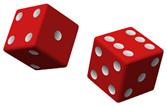

In [3]:
freq_by_value = {}
for i in range(1, 7):
    for j in range(1, 7):
        freq_by_value[i+j] = freq_by_value.get(i+j, 0) + 1

print(freq_by_value)

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


In [4]:
import pandas as pd

df = pd.DataFrame({'Sum': freq_by_value.keys(), 'Frequency': freq_by_value.values()})
df['Probability'] = df['Frequency']/df['Frequency'].sum()

df

,Sum,Frequency,Probability
0,2,1,0.027778
1,3,2,0.055556
2,4,3,0.083333
3,5,4,0.111111
4,6,5,0.138889
5,7,6,0.166667
6,8,5,0.138889
7,9,4,0.111111
8,10,3,0.083333
9,11,2,0.055556


In [5]:
# Calculate expected value
E = (df['Sum']*df['Probability']).sum()
print(f"The expected value id {np.round(E,2)}")

The expected value id 7.0


Text(0, 0.5, 'Probability')

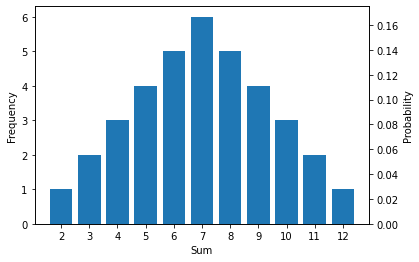

In [6]:
# Plot the probability frequency distribution
import matplotlib.pyplot as plt

ax1 = plt.subplot()

ax1.bar(df['Sum'], df['Frequency'])
plt.xticks(df['Sum'])
ax1.set_xlabel("Sum")
ax1.set_ylabel("Frequency")

ax2 = ax1.twinx()

ax2.bar(df['Sum'], df['Probability'])
ax2.set_ylabel("Probability")

#### **Binomial distribution**
You have a fair coin (equal probability of heads or tails). You will toss it 100 times. 
What is the probability of 60 or more heads? 



Binomial distribution:

$P(k) = \binom{n}{k}p^{k}(1-p)^{n-k}$

where n is the number o trials, k is the number of favourable outcomes, p is the probability of getting head (or tail). $\binom{n}{k}=\frac{n!}{k!(n-k)!}$ is the binomial coefficient.

Probability of getting at least m heads after n trials:

$P(k>m) = \sum_{k=m}^{k=n}\binom{n}{k}p^{k}(1-p)^{n-k}$

In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

<BarContainer object of 31 artists>

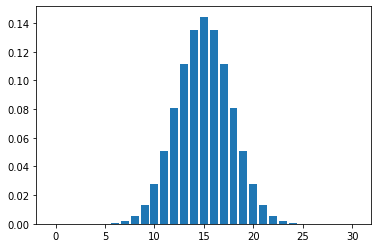

In [16]:
# Plot binomial distribution

def P(n, k, p=0.5):
    # return np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))*(p**k)*(1-p)**(n-k)
    return scipy.stats.binom.pmf(k=k, n=n, p=p) # probability mass funcion of binomial ditribution

n_trials = 30
p = 0.5

results = []
for k in range(0, n_trials+1):
    results.append(P(n_trials, k, p=p))

x = list(range(0, n_trials+1))
y = results
plt.bar(x, y)
#plt.title('Flipping a coin:\nprobability of getting k heads after 30 trials ')
#plt.plot(list(range(0, n_trials)), np.cumsum(results))


The probability of getting 60 or more heads is 0.028



<BarContainer object of 41 artists>

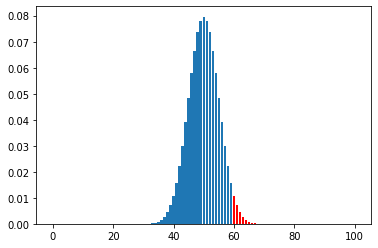

In [19]:
# Problem solution

p = 0.5
m = 60
n_trials = 100

results=[]
for k in range(0, n_trials+1):
    results.append(P(n_trials, k, p))

print(f'The probability of getting {m} or more heads is {sum(results[m:]):.3f}\n')

x = list(range(0, n_trials+1))
y = results
plt.bar(x, y)

x = list(range(m, n_trials+1))
y = results[m:]
plt.bar(x, y, color='red')



#### **Hypotesis testing: fair coin or not?**
You have an unknown coin. You toss it 100 times and count 60 heads. 
Your job as a statistician is to draw a conclusion (inference) from this data. Is it fair or not?



In [10]:
# defining functions to simulate experiment

import numpy as np

def toss_coin(p_head=0.5):
    # simulates flip of a coin
    # 0: tail
    # 1: head
    return np.random.choice([1,0], p=[p_head, 1-p_head])
        
def run_experiment(n_trials, p_head=0.5):
    # flip a coin n_trials times
    l = []
    for t in range(n_trials):
        result = toss_coin(p_head=p_head)
        l.append(result)
    
    return l


<BarContainer object of 2 artists>

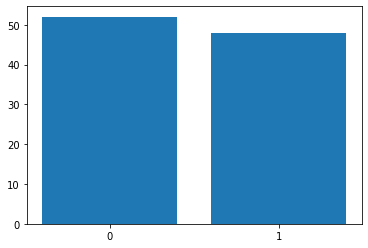

In [11]:
import matplotlib.pyplot as plt

# Run experiment
n_trials = 100
p_head = 0.5
results = run_experiment(n_trials, p_head)

freq_by_outcome = {}
for i in set(results):
    freq_by_outcome[str(i)] = results.count(i)

plt.bar(freq_by_outcome.keys(), freq_by_outcome.values())


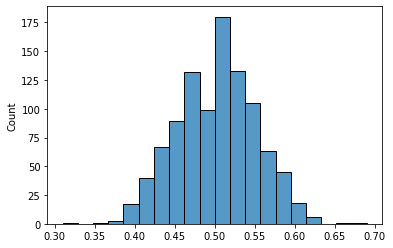

In [12]:
import matplotlib.pyplot as plt

# Run many experiments and plot mean hist

n_experiments = 1000
n_trials = 100
p_head = 0.5

mean_list = []
for i in range(n_experiments):
    results = run_experiment(n_trials, p_head)
    mean_list.append(np.mean(results))

import seaborn as sns
sns.histplot(mean_list, bins=20,)

##### **Problem solution**
Hypotesis testing: can we reject the null hypotesis (fair coin) within a confidence interval of 95%?

Null hypotesis: p = 0.5

Alternative hypotesis: p > 0.5

In [13]:
# Null hypothesis
p = 0.5

alpha = 0.05 # significance

sample_size = 100
p_hat = 0.6 # obtained result
sample_std = np.sqrt(p*(1-p)/sample_size) # calculate std proportion sampling

sample = [1]*int(sample_size*p_hat) + [0]*int(sample_size*(1-p_hat))

from statsmodels.stats.weightstats import ztest
# one sample test
z_score, p_value = ztest(sample, value=0.5, alternative='larger')

print(f'alpha = {alpha}')
print(f'p_value = {p_value:.2f}')
print("Reject null hypotesis") if (p_value < alpha) else print("Fail to reject null hypotesis")

alpha = 0.05
p_value = 0.02
Reject null hypotesis


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
